<a href="https://colab.research.google.com/github/roldugina/freecodecamp_data_analysis_projects/blob/main/page_view_time_series_visualizer/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# @title Default title text
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from calendar import month_name
from matplotlib.ticker import MultipleLocator
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df=pd.read_csv('https://raw.githubusercontent.com/roldugina/freecodecamp_data_analysis_projects/main/page_view_time_series_visualizer/fcc-forum-pageviews.csv',parse_dates=True,index_col='date')


# Clean data
df = df[(df['value']>=np.percentile(df['value'],2.5))&(df['value']<=np.percentile(df['value'],97.5))]


def draw_line_plot():
    # Draw line plot
    fig,ax=plt.subplots(figsize=(12,4))
    ax.plot(df.index,df['value'],color='red')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar=df
    df_bar['year']=df_bar.index.year
    df_bar['month']=df_bar.index.month_name()

    # Draw bar plot

    fig,ax=plt.subplots(figsize=(12,4))

    order = list(month_name)[1:]
    ax=sns.catplot(data=df_bar,x='year',y='value',hue='month',kind='bar',estimator='mean',errorbar=None,palette='tab10',hue_order=order,legend_out=False,facet_kws=dict(despine=False))
    ax.ax.yaxis.set_major_locator(MultipleLocator(20000))
    ax.set(xlabel='Years', ylabel='Average Page Views')
    plt.legend(loc='upper left',title='Months')


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    order=[s[:3] for s in list(month_name)[1:]]
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
    sns.boxplot(data=df_box, x='year',hue='year',y='value', ax=ax[0],palette='tab10',legend=False)
    ax[0].set(xlabel='Year', ylabel='Page Views',title='Year-wise Box Plot (Trend)')
    ax[0].yaxis.set_major_locator(MultipleLocator(20000))
    ax[0].set_ylim(0,200000)

    sns.boxplot(data=df_box, x='month', hue='month', y='value', ax=ax[1],palette='tab10',legend=False,order=order)
    ax[1].set(xlabel='Month', ylabel='Page Views',title='Month-wise Box Plot (Seasonality)')
    ax[1].yaxis.set_major_locator(MultipleLocator(20000))
    ax[1].set_ylim(0,200000)
    fig

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

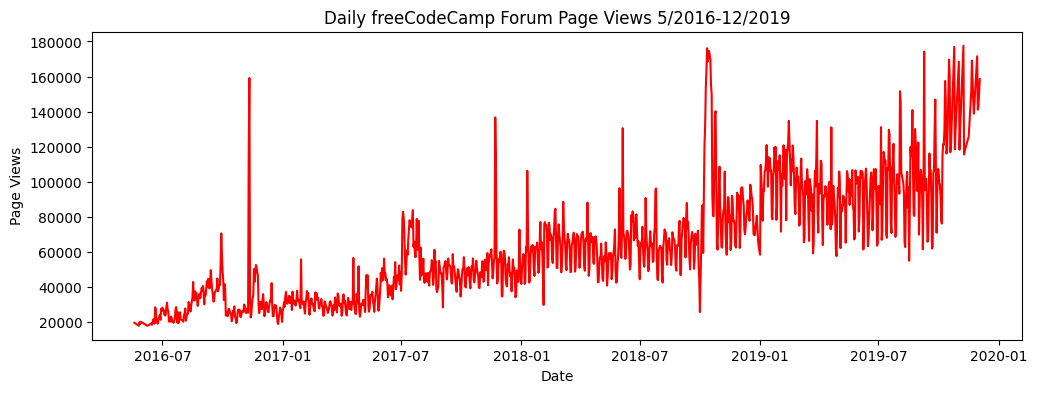

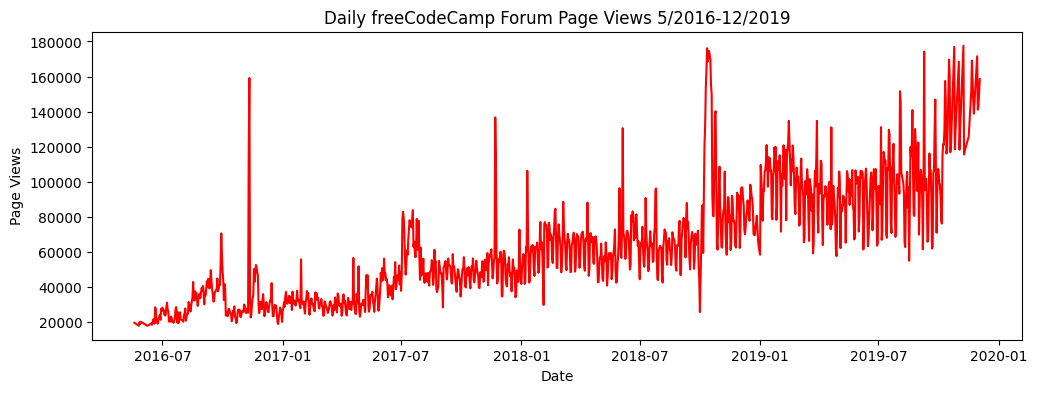

In [2]:
draw_line_plot()

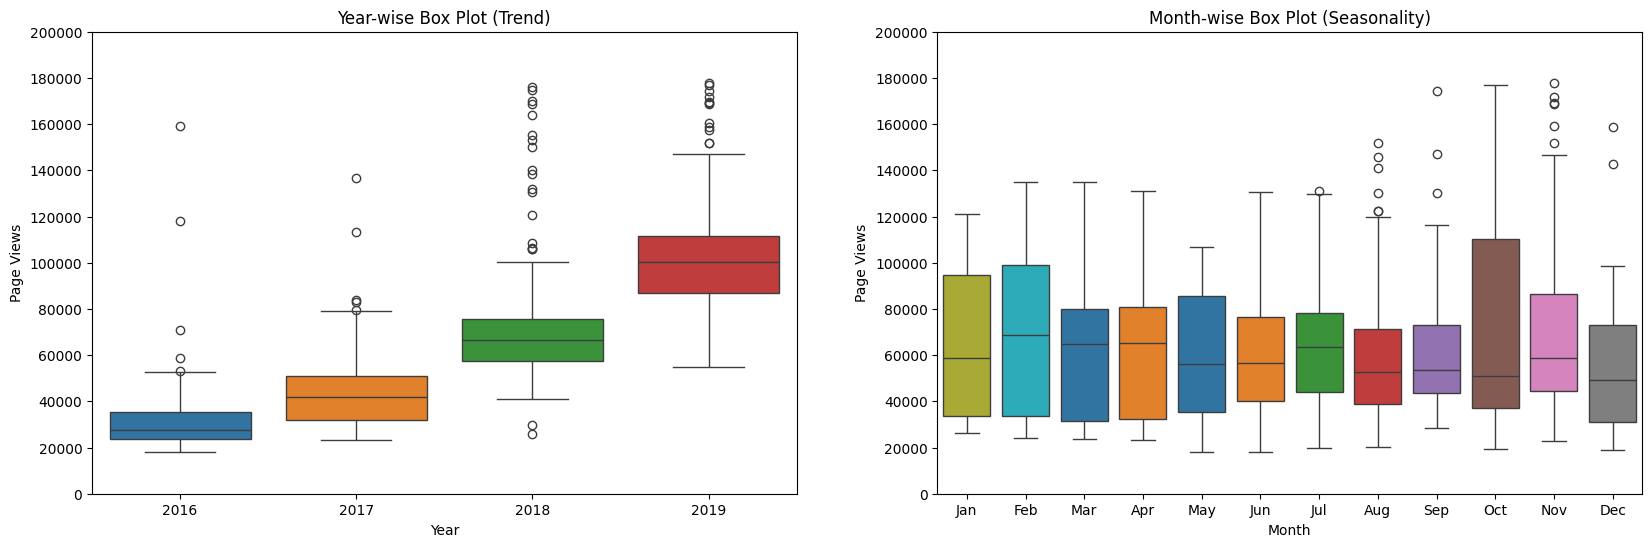

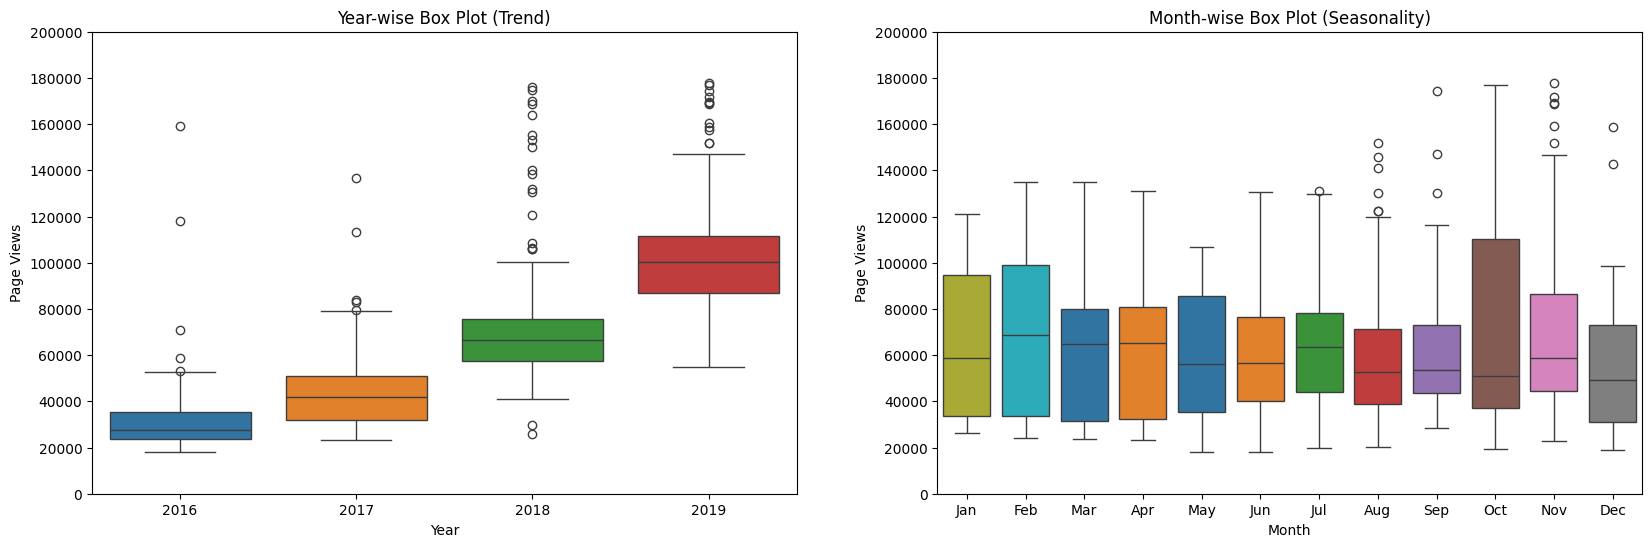

In [6]:
draw_box_plot()

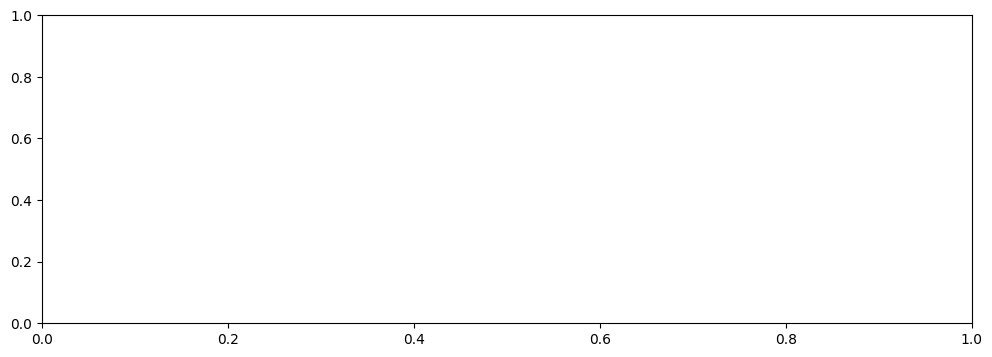

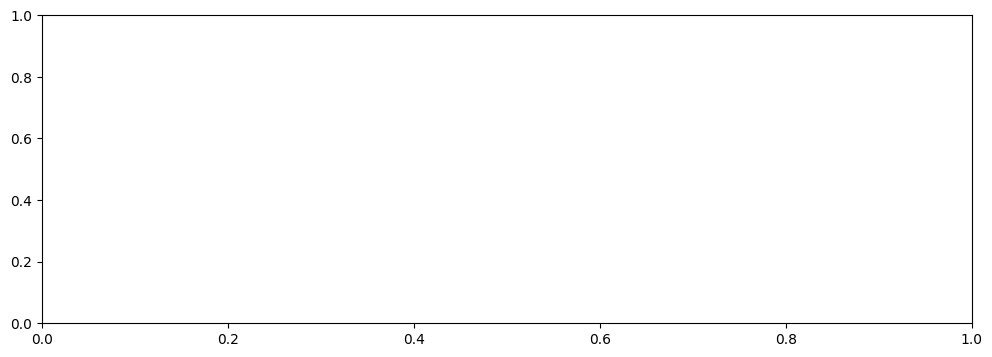

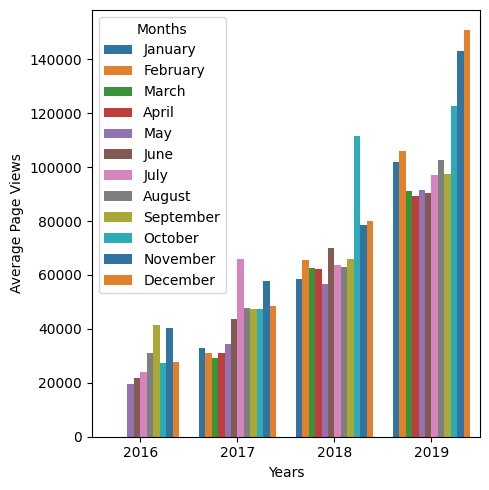

In [7]:
draw_bar_plot()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib.ticker import MultipleLocator
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
%matplotlib inline

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/roldugina/freecodecamp_data_analysis_projects/main/page_view_time_series_visualizer/fcc-forum-pageviews.csv',parse_dates=True,index_col='date')

In [ ]:
df

In [ ]:
df_cleaned = df[(df['value']>=np.percentile(df['value'],2.5))&(df['value']<=np.percentile(df['value'],97.5))]


In [ ]:
fig,ax=plt.subplots(figsize=(12,4))

In [ ]:
ax.plot(df_cleaned.index,df_cleaned['value'],color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
fig

In [ ]:
df_bar=df_cleaned
df_bar['year']=df_bar.index.year
df_bar['month']=df_bar.index.month_name()

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))

In [ ]:
from calendar import month_name
order = list(month_name)[1:]
ax=sns.catplot(data=df_bar,x='year',y='value',hue='month',kind='bar',estimator='mean',errorbar=None,palette='tab10',hue_order=order,legend_out=False,facet_kws=dict(despine=False))
ax.ax.yaxis.set_major_locator(MultipleLocator(20000))
ax.set(xlabel='Years', ylabel='Average Page Views')
plt.legend(loc='upper left',title='Months')
plt.show()

In [ ]:
    df_box = df_cleaned.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime("%b") for d in df_box.date]

    order2=[s[:3] for s in order]

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,6))

In [ ]:
sns.boxplot(data=df_box, x='year',hue='year',y='value', ax=ax[0],palette='tab10',legend=False)
ax[0].set(xlabel='Year', ylabel='Page Views',title='Year-wise Box Plot (Trend)')
ax[0].yaxis.set_major_locator(MultipleLocator(20000))
ax[0].set_ylim(0,200000)

sns.boxplot(data=df_box, x='month', hue='month', y='value', ax=ax[1],palette='tab10',legend=False,order=order2)
ax[1].set(xlabel='Month', ylabel='Page Views',title='Month-wise Box Plot (Seasonality)')
ax[1].yaxis.set_major_locator(MultipleLocator(20000))
ax[1].set_ylim(0,200000)

fig

